In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv ('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## 1. Data Cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop (columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],inplace = True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# Renaming the columns
df.rename (columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [11]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()

In [14]:
df['target'] = encoder.fit_transform (df['target'])

In [15]:
df.head ()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# Checking duplicate values
df.duplicated().sum()

403

In [19]:
# Remove deplicate 
df = df.drop_duplicates(keep = 'first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## 2 EDA

In [22]:
df.head ()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

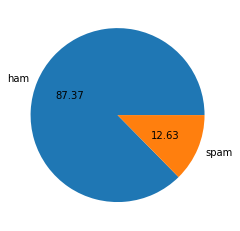

In [25]:
import matplotlib.pyplot as plt 
plt.pie (df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%.2f')
plt.show()

In [26]:
import nltk

In [27]:
nltk.download ('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kailas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
# Number of Characters
df ['num_characters']= df['text'].apply(len)
df.head()

<ipython-input-34-753ba620313a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['num_characters']= df['text'].apply(len)


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len (nltk.word_tokenize (x)))

<ipython-input-35-8f4e6e649df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len (nltk.word_tokenize (x)))


In [36]:
df.head ()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
# Number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len (nltk.sent_tokenize (x)))

<ipython-input-39-7c2c469d35bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len (nltk.sent_tokenize (x)))


In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
# Analyzing the last three created columns
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
# Analyzing the ham messages
df[df['target']==0] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
# Analyzing the spam messages
df[df['target']==1] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [45]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

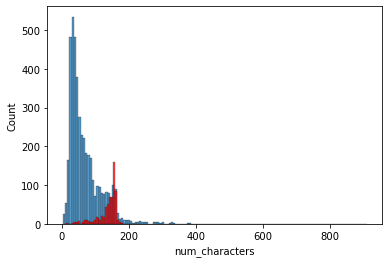

In [47]:
sns.histplot (df[df['target'] ==0]['num_characters'])
sns.histplot (df[df['target'] ==1]['num_characters'], color = 'r')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

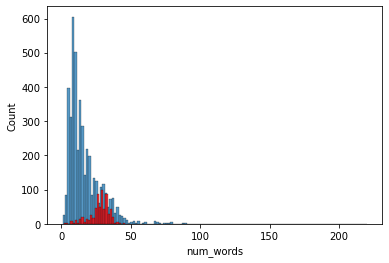

In [48]:
# Plotting ham and spam messages 
sns.histplot (df[df['target'] ==0]['num_words'])
sns.histplot (df[df['target'] ==1]['num_words'], color = 'r')

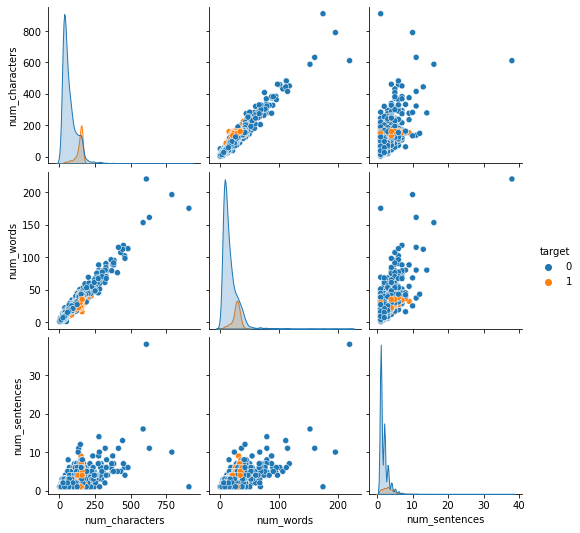

In [50]:
sns.pairplot(df, hue = 'target')

In [52]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

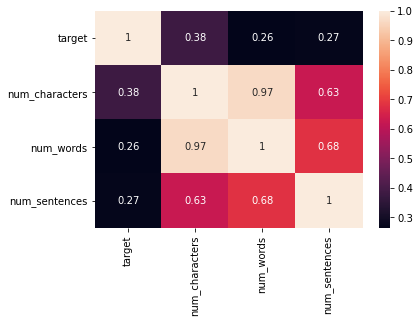

In [53]:
sns.heatmap (df.corr(), annot = True)

## 3 Data Preprocessing
##### - Lower case
##### - Tokenization
##### - Removing special characters
##### - Removing the stop words and punctuation
##### - Stemming

In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kailas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
from nltk.corpus import stopwords
stopwords.words

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [63]:
def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize (text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words ('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [65]:
df['transformed_text'] = df['text'].apply(transform_text)

<ipython-input-65-b507aa02865d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [71]:
from wordcloud import WordCloud

In [75]:
wc = WordCloud (width = 500, height = 500, min_font_size=10, background_color= 'white')

In [76]:
spam_wc = wc.generate (df [df['target'] == 1]['transformed_text'].str.cat(sep=" "))

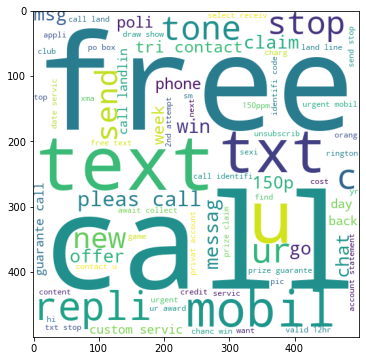

In [81]:
plt.figure (figsize = (20,6))
plt.imshow (spam_wc)

In [82]:
ham_wc = wc.generate (df [df['target'] == 0]['transformed_text'].str.cat(sep=" "))

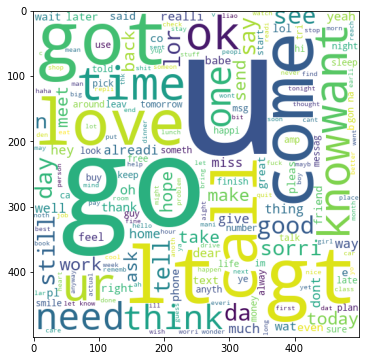

In [83]:
plt.figure (figsize = (20,6))
plt.imshow (spam_wc)

In [86]:
# Getting top 30 words of both category of target

spam_corpus = []
for msg in df [df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append (word)

In [87]:
len (spam_corpus)

9941

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


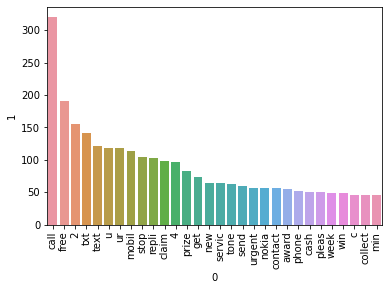

In [99]:
from collections import Counter
sns.barplot (pd.DataFrame (Counter(spam_corpus).most_common (30))[0], pd.DataFrame (Counter(spam_corpus).most_common (30))[1])
plt.xticks (rotation = 'vertical')
plt.show()

In [100]:
# For ham category

ham_corpus = []
for msg in df [df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append (word)

In [101]:
len (ham_corpus)

35303

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


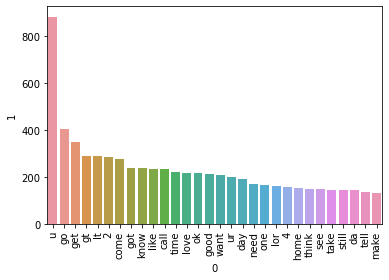

In [102]:
from collections import Counter
sns.barplot (pd.DataFrame (Counter(ham_corpus).most_common (30))[0], pd.DataFrame (Counter(ham_corpus).most_common (30))[1])
plt.xticks (rotation = 'vertical')
plt.show()

## 4 Model Building

In [126]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [127]:
cv = CountVectorizer ()

In [128]:
tfidf = TfidfVectorizer ()

In [129]:
X = tfidf.fit_transform (df['transformed_text']).toarray()

In [130]:
X.shape

(5169, 6677)

In [131]:
y = df['target'].values

In [132]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .2, random_state = 2)

In [135]:
from sklearn.naive_bayes  import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [136]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [137]:
gnb.fit(X_train, y_train)

GaussianNB()

In [138]:
y_pred1 = gnb.predict (X_test)
print (accuracy_score (y_test, y_pred1))
print (confusion_matrix(y_test, y_pred1))
print (precision_score(y_test, y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [139]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict (X_test)
print (accuracy_score (y_test, y_pred2))
print (confusion_matrix(y_test, y_pred2))
print (precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [140]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict (X_test)
print (accuracy_score (y_test, y_pred3))
print (confusion_matrix(y_test, y_pred3))
print (precision_score(y_test, y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [141]:
# We are choosing (tfidf and mnb) as the precision score here is much higher

### Model improvement

In [151]:
tfidf = TfidfVectorizer (max_features = 3000)

In [152]:
X = tfidf.fit_transform (df['transformed_text']).toarray()

In [153]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .2, random_state = 2)

In [154]:
from sklearn.naive_bayes  import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [155]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [156]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict (X_test)
print (accuracy_score (y_test, y_pred1))
print (confusion_matrix(y_test, y_pred1))
print (precision_score(y_test, y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [157]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict (X_test)
print (accuracy_score (y_test, y_pred2))
print (confusion_matrix(y_test, y_pred2))
print (precision_score(y_test, y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [158]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict (X_test)
print (accuracy_score (y_test, y_pred3))
print (confusion_matrix(y_test, y_pred3))
print (precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [150]:
# Creating Pickle file 

In [159]:
import pickle 
pickle.dump (tfidf, open ('vectorizer.pkl', 'wb'))
pickle.dump (mnb, open('model.pkl', 'wb'))